In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Separate features (X) and target (y)
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220          

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (12096, 55)
Testing set shape: (3024, 55)


In [4]:
# Select the numerical features to scale
numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                      'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                      'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Numerical features have been scaled.")

Numerical features have been scaled.


--- Random Forest Classifier ---
Accuracy: 0.8598

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       432
           2       0.80      0.66      0.72       432
           3       0.83      0.81      0.82       432
           4       0.94      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.83      0.87      0.85       432
           7       0.93      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



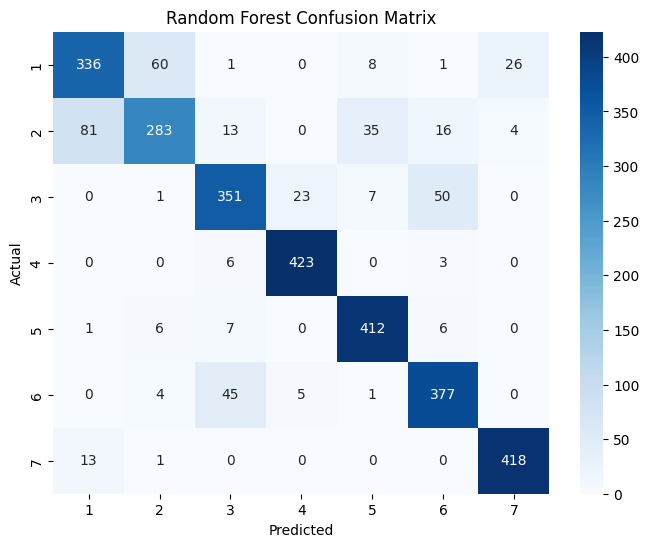

In [5]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 8), yticklabels=np.arange(1, 8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

--- Gradient Boosting Classifier ---
Accuracy: 0.8075

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.72      0.73       432
           2       0.75      0.56      0.64       432
           3       0.74      0.75      0.74       432
           4       0.93      0.95      0.94       432
           5       0.81      0.93      0.86       432
           6       0.76      0.79      0.78       432
           7       0.91      0.96      0.93       432

    accuracy                           0.81      3024
   macro avg       0.80      0.81      0.80      3024
weighted avg       0.80      0.81      0.80      3024



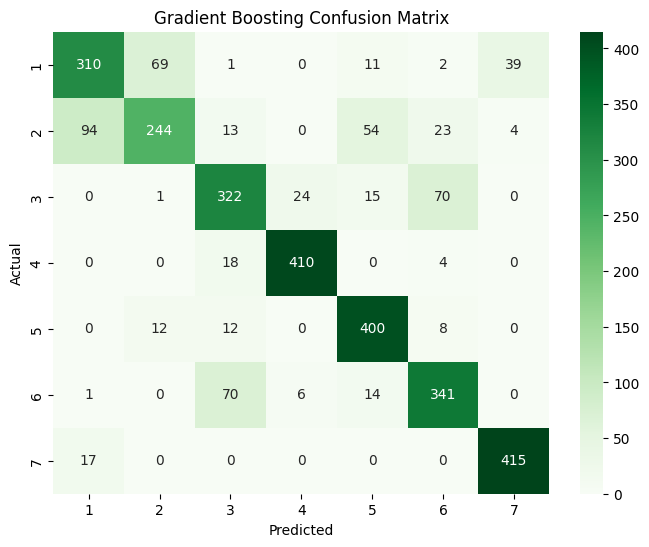

In [11]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("--- Gradient Boosting Classifier ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=np.arange(1, 8), yticklabels=np.arange(1, 8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

In [12]:
# Example of Cross-Validation with Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Scores (Random Forest):")
print(rf_scores)
print(f"Mean Accuracy: {np.mean(rf_scores):.4f}")
print(f"Standard Deviation: {np.std(rf_scores):.4f}")

Cross-Validation Scores (Random Forest):
[0.87731481 0.86607143 0.88062169 0.85945767 0.86739418]
Mean Accuracy: 0.8702
Standard Deviation: 0.0077
